Machine Learning 

Question_2:

Train an SVM regressor on : Bengaluru housing dataset

                  Must include in details:

                           - EDA

                            - Feature engineering 

In [1]:
#  Exploratory Data Analysis (EDA):

In [2]:
import pandas as pd

# Load the dataset
bengaluru_housing_data = pd.read_csv('bengaluru_housing.csv')

# Display the first few rows of the dataset
print(bengaluru_housing_data.head())


              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [3]:
# Check data types and missing values
print(bengaluru_housing_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [4]:
# Summary statistics
print(bengaluru_housing_data.describe())

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [5]:
# Visualize distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

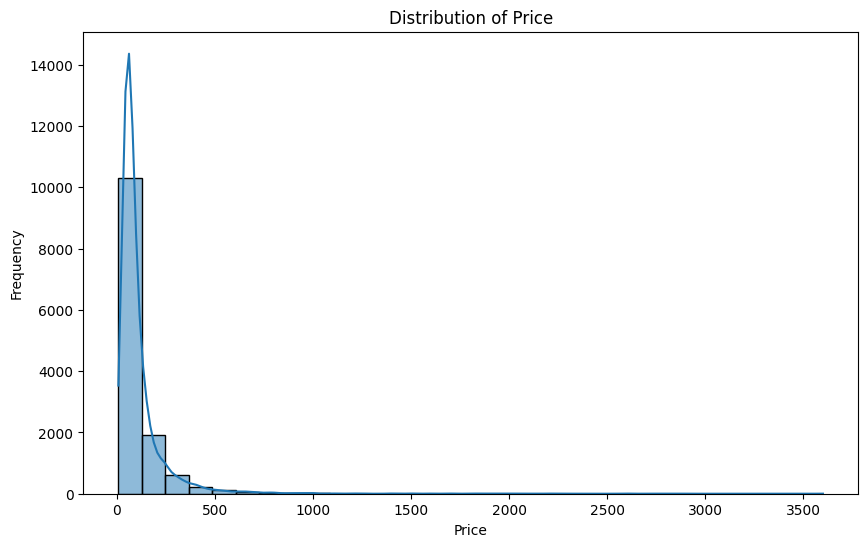

In [6]:
# Example: Distribution of target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(bengaluru_housing_data['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [7]:
#Feature Engineering:

In [8]:
# Check for missing values
print(bengaluru_housing_data.isnull().sum())

# Handle missing values (imputation, removal, or other methods)
# Example:
# If a feature has a significant number of missing values, consider dropping the feature or imputing values.


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [ ]:
# Example: Feature transformation
# Encode categorical variables using one-hot encoding
bengaluru_housing_data = pd.get_dummies(bengaluru_housing_data, columns=['location', 'area_type'])

# Scale numerical features using standardization or normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['total_sqft', 'bath', 'balcony', ...]  # List of numerical features
bengaluru_housing_data[numerical_features] = scaler.fit_transform(bengaluru_housing_data[numerical_features])

In [ ]:
# Split the data into features and target variable
X = bengaluru_housing_data.drop(columns=['price'])
y = bengaluru_housing_data['price']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM regressor
from sklearn.svm import SVR
svm_regressor = SVR(kernel='rbf')  # You can choose different kernels based on your data
svm_regressor.fit(X_train, y_train)

# Predictions
y_pred_train = svm_regressor.predict(X_train)
y_pred_test = svm_regressor.predict(X_test)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")